## Book-Corssing Dataset
Dataset originial found in this [list](https://gist.github.com/entaroadun/1653794) - [directlink](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)

In [1]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   1209      0 --:--:-- --:--:-- --:--:--  1209
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.28)
Already up to date.


In [0]:
from fastai import *
from fastai.collab import *
from fastai.tabular import *

In [3]:
!curl -O http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.8M  100 24.8M    0     0  3893k      0  0:00:06  0:00:06 --:--:-- 5740k


In [4]:
!unzip BX-CSV-Dump.zip

Archive:  BX-CSV-Dump.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [5]:
!ls

BX-Book-Ratings.csv  BX-CSV-Dump.zip  course-v3  entree		     models
BX-Books.csv	     BX-Users.csv     data	 entree_data.tar.gz


In [0]:
path=Path('')

Old CSV files tends to be encoded in something else than UTF-8, thus python 3 (which by default tries to read files in UTF-8) fails when it encounter wrongly encoded characters (e.g. `0xfc`).

In [7]:
ratings = pd.read_csv(path/'BX-Book-Ratings.csv', delimiter=';', encoding='latin-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


The books file (i.e. **BX-Books.csv** ) contains bad data, not only it;s not UTF-8 encoded (but rather latin-1) but also some lines has extra columns (e.g. line number **6452**). That is why we are telling pandas to ignore error by setting the flag **error_bad_lines**.

In [8]:
books = pd.read_csv(path/'BX-Books.csv',  delimiter=';', encoding='latin-1', error_bad_lines=False)
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Instead of using the meaningless ISBN codes, use the book names, later it will help interpreting the recommendations.

In [9]:
rating_book = ratings.merge(books[['ISBN', 'Book-Title']])
rating_book.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [0]:
data = CollabDataBunch.from_df(rating_book, seed=42, pct_val=0.1, user_name='User-ID', item_name='Book-Title', rating_name='Book-Rating')

In [23]:
data.show_batch()

User-ID,Book-Title,target
182334,Choke,0.0
216411,The Glass Lake,0.0
69697,Midnight Jewels,9.0
46897,Wind-Up Bird Chronicle,10.0
250709,Ad Police (Ad Police),5.0
23902,Triple (Bookcassette(r) Edition),5.0
110029,Best Mans Handbook,0.0
152958,The Coldest Winter Ever,0.0


Ratings are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [0]:
y_range = [0,10.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

epoch,train_loss,valid_loss


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


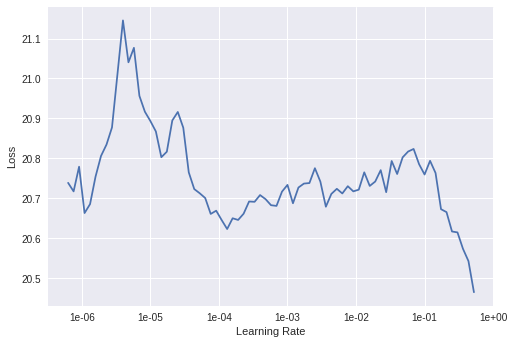

In [14]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [15]:
learn.fit_one_cycle(5, 1e-1)

Total time: 19:53
epoch  train_loss  valid_loss
1      15.048554   14.940901   (03:58)
2      15.467329   15.421408   (03:58)
3      14.969577   14.875525   (03:59)
4      14.105888   13.993391   (03:58)
5      13.375766   13.295375   (03:57)



In [0]:
learn.save('dotprod')

## Interpretation

### Setup

In [0]:
learn.load('dotprod');

In [18]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(86851, 40)
  (i_weight): Embedding(227837, 40)
  (u_bias): Embedding(86851, 1)
  (i_bias): Embedding(227837, 1)
)

In [25]:
g = rating_book.groupby('Book-Title')['Book-Rating'].count()
top_books = g.sort_values(ascending=False).index.values[:1000]
top_books[:10]

array(['Wild Animus', 'The Lovely Bones: A Novel', 'The Da Vinci Code', 'A Painted House',
       'The Nanny Diaries: A Novel', "Bridget Jones's Diary", 'The Secret Life of Bees',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel', 'The Red Tent (Bestselling Backlist)', 'Angels &amp; Demons'],
      dtype=object)

### Book bias

In [26]:
book_bias = learn.bias(top_books, is_item=True)
book_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_book.groupby('Book-Title')['Book-Rating'].mean()
book_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_books, book_bias)]

In [0]:
item0 = lambda o:o[0]

In [31]:
sorted(book_ratings, key=item0)[:15]

[(tensor(-1.3601), 'Wild Animus', 1.0195843325339728),
 (tensor(-0.3963), 'Isle of Dogs', 2.0),
 (tensor(-0.3473), 'While I Was Gone', 2.5800464037122968),
 (tensor(-0.3418), 'A Map of the World', 2.492354740061162),
 (tensor(-0.3416), 'How Stella Got Her Groove Back', 2.1857142857142855),
 (tensor(-0.3383), 'Women Who Run with the Wolves', 2.121212121212121),
 (tensor(-0.3196),
  'All the Pretty Horses (The Border Trilogy, Vol 1)',
  2.2312925170068025),
 (tensor(-0.3163), 'Slow Waltz in Cedar Bend', 1.8951612903225807),
 (tensor(-0.3151),
  'Midnight in the Garden of Good and Evil: A Savannah Story',
  3.147169811320755),
 (tensor(-0.3106), 'Pleading Guilty', 1.463235294117647),
 (tensor(-0.3106), 'Here on Earth', 2.245614035087719),
 (tensor(-0.3037), 'Surfacing', 1.6407766990291262),
 (tensor(-0.3015), 'Message in a Bottle', 2.778225806451613),
 (tensor(-0.2956), 'The Reader', 3.0128755364806867),
 (tensor(-0.2886), 'To the Lighthouse', 2.1607142857142856)]

In [32]:
sorted(book_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.2653),
  'Harry Potter and the Goblet of Fire (Book 4)',
  5.8242894056847545),
 (tensor(0.2598),
  "Harry Potter and the Sorcerer's Stone (Book 1)",
  5.737410071942446),
 (tensor(0.2553),
  'Harry Potter and the Prisoner of Azkaban (Book 3)',
  5.852803738317757),
 (tensor(0.1708), 'The Giver (21st Century Reference)', 4.916201117318436),
 (tensor(0.1657), 'Dragonfly in Amber', 4.47682119205298),
 (tensor(0.1650), 'The Little Prince', 5.815602836879433),
 (tensor(0.1539),
  'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
  5.00711743772242),
 (tensor(0.1443),
  'Harry Potter and the Chamber of Secrets (Book 2)',
  5.183453237410072),
 (tensor(0.1361), 'Where the Red Fern Grows', 4.2180451127819545),
 (tensor(0.1356),
  "Ender's Game (Ender Wiggins Saga (Paperback))",
  5.409638554216867),
 (tensor(0.1333), 'The Other Boleyn Girl', 4.761006289308176),
 (tensor(0.1200),
  'Harry Potter and the Order of the Phoenix (Book 5)',
  5.501440922190202),
 (tensor(0.1

### Book weights

In [33]:
book_w = learn.weight(top_books, is_item=True)
book_w.shape

torch.Size([1000, 40])

In [34]:
book_pca = book_w.pca(3)
book_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = book_pca.t()
book_comp = [(f, i) for f,i in zip(fac0, top_books)]

In [36]:
sorted(book_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.8206), 'The Hundred Secret Senses'),
 (tensor(0.7492), 'Back Roads'),
 (tensor(0.7464), "A Thousand Acres (Ballantine Reader's Circle)"),
 (tensor(0.7068), 'Journey'),
 (tensor(0.6644), 'The Right Hand of Evil'),
 (tensor(0.6476),
  "Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))"),
 (tensor(0.6391), 'A Man in Full'),
 (tensor(0.6266), "River's End"),
 (tensor(0.6221), 'Disclosure'),
 (tensor(0.6208), 'Paradise')]

In [37]:
sorted(book_comp, key=itemgetter(0))[:10]

[(tensor(-1.0019), 'The Little Prince'),
 (tensor(-0.9657), 'The Other Boleyn Girl'),
 (tensor(-0.8824), 'Kitchen'),
 (tensor(-0.7876), 'Their Eyes Were Watching God: A Novel'),
 (tensor(-0.7600), 'Interpreter of Maladies'),
 (tensor(-0.7523),
  'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players'),
 (tensor(-0.7500), 'Lucky'),
 (tensor(-0.7478),
  "Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper))"),
 (tensor(-0.7452), 'Divine Secrets of the Ya-Ya Sisterhood : A Novel'),
 (tensor(-0.7430), "Einstein's Dreams")]

In [0]:
book_comp = [(f, i) for f,i in zip(fac1, top_books)]

In [39]:
sorted(book_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.3240), 'Dreamcatcher'),
 (tensor(0.2772), 'The Testament'),
 (tensor(0.2697), 'SHIPPING NEWS'),
 (tensor(0.2419), 'A Walk to Remember'),
 (tensor(0.2414), 'The Subtle Knife (His Dark Materials, Book 2)'),
 (tensor(0.2334), '4 Blondes'),
 (tensor(0.2278), 'Cradle and All'),
 (tensor(0.2268), 'The Genesis Code'),
 (tensor(0.2258), 'In Pursuit of the Proper Sinner'),
 (tensor(0.2035),
  'Stupid White Men ...and Other Sorry Excuses for the State of the Nation!')]

In [40]:
sorted(book_comp, key=itemgetter(0))[:10]

[(tensor(-0.2711), 'The Deep End of the Ocean'),
 (tensor(-0.2311), 'The Divine Secrets of the Ya-Ya Sisterhood: A Novel'),
 (tensor(-0.2224), 'Empire Falls'),
 (tensor(-0.2196), 'Sphere'),
 (tensor(-0.1969), 'The Winner'),
 (tensor(-0.1911), 'Desperation'),
 (tensor(-0.1863), 'Oryx and Crake'),
 (tensor(-0.1862), 'The Girl Who Loved Tom Gordon'),
 (tensor(-0.1832),
  'Into Thin Air : A Personal Account of the Mt. Everest Disaster'),
 (tensor(-0.1815), 'Wuthering Heights')]

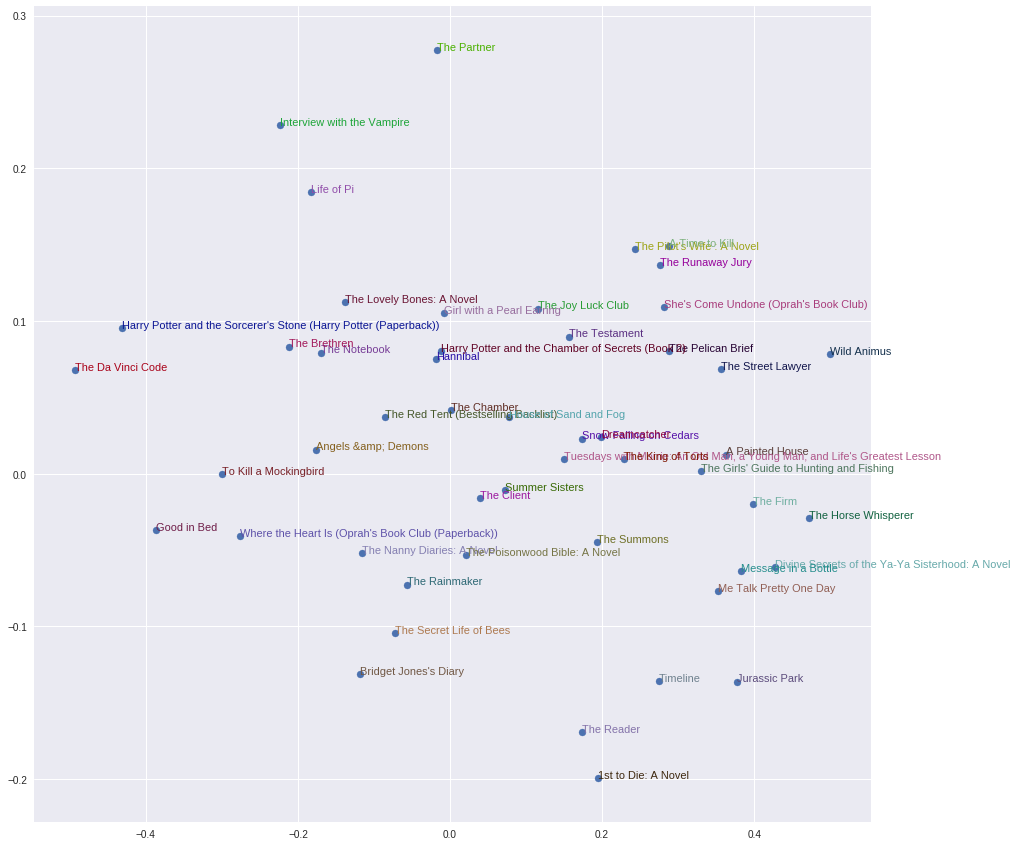

In [41]:
idxs = np.random.choice(len(top_books), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_books[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()